In [1]:
import pandas as pd

# How many genera ("genuses") have we seen?

In [2]:
results = pd.read_csv('seen_list.csv')

In [3]:
results[['genus', 'species']] = results['scientific name'].str.split(' ', expand=True)

In [4]:
genera = results['genus'].unique()

In [5]:
for genus in genera:
    total_sightings_of_genus = sum(results.loc[results['genus'] == genus, 'number of people seeing species'].values)
    results.loc[results['genus']==genus, 'total sightings of genus'] = total_sightings_of_genus

In [6]:
unfound_genera = results[results['total sightings of genus'] == 0]['genus'].unique()

In [7]:
print(f'Of {len(genera)} genera, we have seen {len(genera) - len(unfound_genera)}.')
print(f"That means we're missing {len(unfound_genera)} genera!")

Of 2265 genera, we have seen 1685.
That means we're missing 580 genera!


### How many species are in each unfound genera?

In [11]:
unfound_genera_species = []
print("Missing genera with more than 5 representatives:")
for genus in unfound_genera:
    num_spp = results.loc[results['genus']==genus].shape[0]
    unfound_genera_species.append(num_spp)
    if num_spp > 5:
        print(genus, f'({num_spp} species)')

Missing genera with more than 5 representatives:
Alopecoenas (13 species)
Gallicolumba (7 species)
Coenocorypha (6 species)
Micropsitta (6 species)
Cyanoramphus (10 species)
Charmosyna (14 species)
Lorius (6 species)
Eos (6 species)
Melidectes (9 species)
Ptiloprora (6 species)
Melanocharis (6 species)
Pomarea (9 species)
Paradisaea (7 species)
Poecilodryas (6 species)
Certhilauda (6 species)
Spelaeornis (8 species)
Sheppardia (9 species)


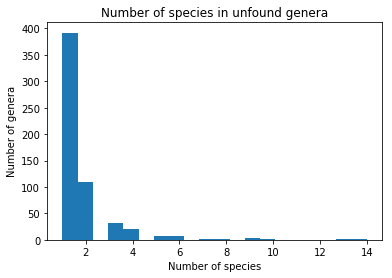

In [12]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(unfound_genera_species, bins=20)
xlabel = plt.xlabel('Number of species')
ylabel = plt.ylabel('Number of genera')
title = plt.title('Number of species in unfound genera')
plt.show()

Unsurprisingly, most of the unfound genera have only one or two representatives.

In [10]:
print('Number of single-species unfound genera:', int(n[0]))
print('Number of two-species unfound genera:', int(n[1]))

Number of single-species unfound genera: 392
Number of two-species unfound genera: 110
